# Rapport : Preuve de Concept pour la Décomposition des Automates Finis Déterministes (DFA)

**Encadré par : Bruno Denis**

**Réalisé par :  Othmane Chgari**

## I.Introduction

Les automates finis déterministes (DFA) sont essentiels pour modéliser des systèmes dynamiques, mais les DFA monolithiques montrent leurs limites face à la complexité croissante des systèmes. Ils manquent de modularité, deviennent rapidement complexes, et peinent à représenter fidèlement les comportements sous-jacents.

Cet article, intitulé « Learning Deterministic Finite Automata Decompositions from Examples and Demonstrations », propose une méthodologie innovante pour surmonter ces limitations. L'objectif principal est de démontrer qu'il est possible de décomposer un système en plusieurs sous-DFA interconnectés, offrant une alternative modulaire et efficace aux DFA monolithiques. 

Cette approche repose sur deux piliers techniques principaux : l'encodage SAT, pour formaliser et résoudre les contraintes DFA de manière optimale, et la recherche Pareto-optimale, afin de minimiser la complexité globale tout en maximisant la modularité. L’approche vise à garantir une meilleure scalabilité, une interprétabilité accrue et une gestion facilitée des systèmes complexes, en divisant un système global en sous-DFA, chacun capturant un aspect spécifique du comportement tout en maintenant une cohérence avec le modèle global.


---

## II.Définition du Problème et Méthodologie

### 1.Définition du Problème

Le problème d’identification des décompositions DFA (**DFA-DIP**) peut être formalisé ainsi :

**Entrées** :
- **𝐷+** : Ensemble d’exemples positifs à accepter.
- **𝐷−** : Ensemble d’exemples négatifs à rejeter.
- **𝑛** : Nombre de DFA souhaités dans la décomposition.

**Sortie** :
- Une décomposition optimale \\( (𝐴_1, ..., 𝐴_𝑛) \\), où chaque \\( 𝐴_𝑖 \\) est un DFA avec \\( 𝑚_𝑖 \\) états.

**Contraintes** :
- Tous les exemples positifs doivent être acceptés.
- Tous les exemples négatifs doivent être rejetés.
- La solution doit minimiser les états et transitions (optimisation Pareto).
---

### 2.Méthodologie

1. **Construction de l’APTA** :
   - L’Arbre de Préfixe Étendu (APTA) est la première étape dans le processus de décomposition DFA. Il sert à organiser les séquences d’exemples 𝐷+(positifs) et 𝐷−(négatifs) sous une forme hiérarchique, et à préparer les contraintes pour l’encodage SAT.

2. **Encodage en contraintes SAT** :
   - Une fois l’APTA construit, il est transformé en un ensemble de contraintes logiques exprimées sous forme de formules SAT (Satisfiability). Ces contraintes permettent de décrire les règles que doivent respecter les DFA générés.

3. **Résolution SAT** :
   - Une fois les contraintes traduites, elles sont soumises à un solveur SAT (par exemple, Glucose4) pour identifier les solutions compatibles. Ces solutions correspondent à des DFA candidats.

4. **Optimisation Pareto** :
   - Les DFA candidats générés par le solveur SAT sont ensuite filtrés pour identifier les solutions Pareto-optimales. Critères d'optimisation :
         
      - Minimiser le nombre total d'états.
      - Réduire les transitions non nécessaires


5. **Validation et Visualisation** :
   - Les DFA finaux sont testés pour vérifier qu’ils respectent les contraintes d'acceptation et de rejet. Une fois validés, ils sont visualisés sous forme de graphes.

      Validation :

       -	Comparer les DFA générés aux exemples 𝐷+ et  𝐷−.
       - Vérifier que tous les exemples positifs sont acceptés et que les négatifs sont rejetés.

      Visualisation :

       -	Les DFA sont exportés sous forme de graphes pour faciliter leur interprétation.
       -	Chaque état, transition, et étiquette est représenté visuellement.


6.	Diagramme d'Activité

Le diagramme ci-dessous illustre les étapes de la méthodologie de manière visuelle :



   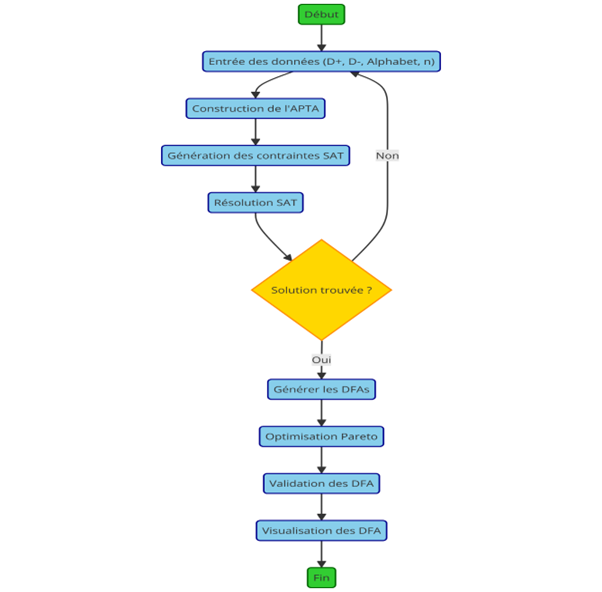

---


### 3. Estimation de la Complexité en Temps et en Espace

Dans cette section, nous estimons la complexité temporelle et spatiale des différentes étapes de la méthodologie, en tenant compte des facteurs influençant la performance des DFA décomposés.
##### 3.1. Construction de l’APTA : 
- **Temps** : \(O(n.m)\), où \(n\) est le nombre de séquences et \(m\) leur longueur moyenne.  
- **Espace** : \(O(s)\), où \(s\) est le nombre de nœuds dans l'APTA.
#### 3.2. Encodage et Résolution SAT :
- **Temps** :  
  - Encodage SAT : \(O(s^2 . σ)\), où \(s\) est le nombre de nœuds et \(σ\) la taille de l'alphabet.  
  - Résolution SAT : \(O(2^v)\), où \(v\) est le nombre de variables logiques.
- **Espace** :  
  - Encodage SAT : \(O(s^2 . σ)\).  
  - Résolution : \(O(v)\).
#### 3.3. Optimisation du Nombre de DFA
L'optimisation réduit les redondances et transitions inutiles.
- **Temps** : \(O(n_d . n . m + t)\), où \(n_d\) est le nombre de DFA, \(n\) le nombre de séquences, et \(t\) le nombre de transitions.  
- **Espace** : \(O(n_d . s_d)\), où \(s_d\) est la taille moyenne d’un DFA.
#### 3.4. Validation et Visualisation
Les DFA générés sont testés et représentés graphiquement.

- **Temps** : \(O(n_d . n . m + t)\).  
- **Espace** : \(O(t)\), où \(t\) est le nombre de transitions.

#### Résumé Global

| Étape                      | Complexité temporelle                 | Complexité spatiale           |
|----------------------------|---------------------------------------|------------------------------ |
| Construction de l’APTA     | \(O(n.m)\)                            | \(O(s)\)                      |
| Encodage SAT               | \(O(s^2 .σ )\)                        | \(O(s^2 .σ)\)                 |
| Résolution SAT             | \(O(2^v)\)                            | \(O(v)\)                      |
| Optimisation DFA           | \(O(n_d . n . m + t)\)                | \(O(n_d . s_d)\)              |
| Validation et Visualisation| \(O(n_d . n . m + t)\)                | \(O(t)\)                      |



#### Interprétation
 
   La résolution SAT est le facteur le plus coûteux en temps et espace, en raison de sa dépendance exponentielle au nombre de variables.

---




## III. Implémentation 
### 1. Description Étape par Étape :
Dans le cadre de la preuve de concept , j'ai utilisé la bibliothèque **DFA Identify** pour visualiser les résultats et vérifier le bon fonctionnement des algorithmes. Cette bibliothèque, qui implémente déjà les étapes d'apprentissage et d'identification des automates décrites dans l'article, m'a permis de me focaliser sur l'analyse des résultats et l'optimisation des performances.

Avant d'utiliser la bibliothèque DFA Identify, j'avais développé un code personnel pour implémenter les algorithmes d'apprentissage et d'identification des automates. Cependant, les résultats obtenus avec ce code n'étaient pas aussi fiables que ceux produits par DFA Identify. La bibliothèque m'a permis d'obtenir des résultats plus précis et de visualiser efficacement les automates générés.

- Structure de la Bibliothèque

La bibliothèque utilisée, DFA Identify, fournit un cadre robuste pour la décomposition des DFA. Voici un aperçu des principaux fichiers et de leurs rôles :

1. encoding.py : Ce module gère l'encodage des contraintes DFA en SAT. Il transforme les besoins en formules logiques pouvant être résolues par un solveur SAT.

2. graphs.py : Ce module se concentre sur les opérations relatives aux graphes pour visualiser les DFA et analyser leur structure.

3. identify.py : Il contient les fonctionnalités principales pour construire et analyser les DFA, notamment l'identification des DFA minimaux compatibles avec des exemples donnés.

4. active.py : Ce module fournit des fonctionnalités d'apprentissage actif, permettant de poser des questions interactives pour affiner le modèle DFA basé sur des exemples.

5. concept_class_restrictions.py : Il contient des restrictions spécifiques et des invariants pour la construction DFA, garantissant que les modèles respectent des contraintes structurelles ou sémantiques données.

6. decomposed.py : Ce module implémente la logique de décomposition des DFA, avec des méthodes comme find_decomposed_dfas qui constituent le cœur de l'approche décomposée.

7. __init__.py : Point d'entrée de la bibliothèque, il expose les méthodes clés et assure la modularité.
### Étape 1 : Importation des Bibliothèques
Le code commence par l'importation des bibliothèques nécessaires pour la manipulation des DFA, la visualisation et le traitement des données :

In [7]:
pip install  dfa_identify

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install  graphviz

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install dfa

Note: you may need to restart the kernel to use updated packages.


In [4]:
from dfa_identify import find_decomposed_dfas  # Pour identifier et décomposer les DFA
from graphviz import Digraph  # Pour générer des visualisations graphiques des DFA
from dfa import dfa2dict  # Convertit les DFA en dictionnaires pour extraire les transitions
import pandas as pd  # Pour organiser et exporter les résultats des tests
import matplotlib.pyplot as plt  # Pour afficher les graphes des DFA

### Étape 2 : Visualisation des DFA

Cette fonction utilise `Graphviz` pour générer des graphes représentant les DFA.

- Processus :

Ajoute les états au graphe en distinguant les états acceptants (double cercle).

Ajoute les transitions entre les états avec leurs étiquettes (symboles).

- Sortie : Une image PNG représentant le DFA.



In [3]:
def visualize_dfa(dfa, name, final_states):
    """
    Visualise le DFA en indiquant correctement les états acceptants.
    :param dfa: L'automate fini déterministe à visualiser.
    :param name: Nom du fichier pour la sauvegarde de l'image.
    :param final_states: Ensemble des états finaux (acceptants) du DFA.
    """
    graph = Digraph(name)  # Initialiser un graphe
    transitions, _ = dfa2dict(dfa)  # Extraire les transitions du DFA

    # Ajouter les états au graphe
    for state in transitions.keys():
        is_accepting = state in final_states  # Vérifier si l'état est acceptant
        shape = "doublecircle" if is_accepting else "circle"  # Double cercle pour les états acceptants
        graph.node(str(state), shape=shape)  # Ajouter l'état avec sa forme

    # Ajouter les transitions au graphe
    for src, (_, trans) in transitions.items():
        if isinstance(trans, dict):  # Vérifier si les transitions sont valides
            for symbol, dest in trans.items():
                graph.edge(str(src), str(dest), label=str(symbol))  # Ajouter une arête avec l'étiquette du symbole

    # Sauvegarder le graphe et afficher son chemin
    output_file = f"{name}.png"
    graph.render(output_file, format="png", cleanup=True)
    print(f"DFA visualisé et sauvegardé sous : {output_file}")
    return f"{output_file}.png"


### Étape 3 : Comptage des Transitions 
Cette fonction calcule le nombre de transitions uniques dans un DFA :
 - Objectif : Évaluer la complexité structurelle d'un DFA en termes de transitions.
 - Structure : Les transitions sont stockées dans un ensemble pour éviter les doublons.

In [4]:
def count_transitions(dfa):
    """
    Compte le nombre de transitions uniques dans un DFA.
    :param dfa: Le DFA à analyser.
    :return: Nombre de transitions uniques.
    """
    transitions, _ = dfa2dict(dfa)  # Extraire les transitions du DFA
    unique_transitions = set()  # Utiliser un ensemble pour éviter les doublons
    for src, (_, trans) in transitions.items():
        if isinstance(trans, dict):  # Vérifier si les transitions sont valides
            for symbol, dest in trans.items():
                unique_transitions.add((src, symbol, dest))  # Ajouter chaque transition unique
    return len(unique_transitions)



### Étape 4 : Boucle Principale de Test

Cette fonction traite chaque cas de test, génère les DFA correspondants, les visualise, et valide leurs comportements.

Elle stocke les résultats dans un fichier CSV et affiche un résumé dans le terminal.


In [5]:
def test_cases_with_final_states(test_cases):
    """
    Traite chaque cas de test, identifie les états finaux, visualise les DFA, et affiche les graphes.
    :param test_cases: Liste des cas de test contenant les séquences acceptées/rejetées.
    """
    results = []  # Liste pour stocker les résultats des tests
    images_to_display = []  # Liste pour stocker les chemins des images à afficher

    for case in test_cases:  # Parcourir chaque cas de test
        print(f"Test : {case['name']}")
        try:
            # Identifier les DFA décomposés à partir des séquences
            decomposed_dfas = find_decomposed_dfas(
                accepting=case['accepting'],
                rejecting=case['rejecting'],
                n_dfas=case['n_dfas'],
                decompose_via="conjunction",  # Méthode de décomposition
                alphabet=case['alphabet']
            )
            dfas = next(decomposed_dfas)  # Obtenir les DFA décomposés
            
            # Collecter les statistiques pour chaque DFA
            dfa_states = [len(dfa.states()) for dfa in dfas]
            dfa_transitions = []
            for idx, dfa in enumerate(dfas):
                final_states = {state for state in dfa.states() if dfa.label((), start=state)}  # Identifier les états acceptants
                transitions_count = count_transitions(dfa)  # Compter les transitions
                dfa_transitions.append(transitions_count)

                # Visualiser et sauvegarder chaque DFA
                image_path = visualize_dfa(dfa, f"{case['name']}_DFA_{idx+1}", final_states)
                images_to_display.append((case["name"], image_path))  # Ajouter l'image pour affichage
            
            # Validation des séquences acceptées et rejetées
            all_positives_accepted = all(
                all(dfa.label(tuple(seq), start=dfa.start) for dfa in dfas)
                for seq in case['accepting']
            )
            all_negatives_rejected = all(
                any(not dfa.label(tuple(seq), start=dfa.start) for dfa in dfas)
                for seq in case['rejecting']
            )
            
            # Ajouter les résultats du test
            results.append({
                "Cas": case["name"],
                "Nombre DFA": len(dfas),
                "États totaux": sum(dfa_states),
                "Transitions totales": sum(dfa_transitions),
                "Positifs acceptés": "Oui" if all_positives_accepted else "Non",
                "Négatifs rejetés": "Oui" if all_negatives_rejected else "Non"
            })
        except StopIteration:
            print(f"Aucun DFA décomposé trouvé pour le cas : {case['name']}")
        except Exception as e:
            print(f"Erreur pour le cas {case['name']} : {e}")
    
    # Afficher et sauvegarder les résultats
    df_results = pd.DataFrame(results)
    print("\n=== Résultats des tests ===\n")
    print(df_results.to_markdown(index=False))
    df_results.to_csv("resultats_tests_dfa.csv", index=False)
    print("\nLes résultats des tests ont été sauvegardés dans 'resultats_tests_dfa.csv'.")

    # Afficher les graphes des DFA
    display_graphs(images_to_display)


### Étape 5 : afficher les graphes
Affiche les images des DFA dans une seule ligne pour une meilleure présentation.


In [6]:
def display_graphs(images):
    """
    Affiche tous les graphes des DFA dans une seule ligne.
    :param images: Liste des tuples contenant le nom du graphe et le chemin de son image.
    """
    fig, axs = plt.subplots(1, len(images), figsize=(len(images) * 5, 5))  # Créer une figure avec une ligne de sous-graphiques
    if len(images) == 1:  # Si un seul graphe, convertir en liste pour cohérence
        axs = [axs]

    for ax, (name, img_path) in zip(axs, images):  # Parcourir les graphes
        img = plt.imread(img_path)  # Charger l'image
        ax.imshow(img)  # Afficher l'image
        ax.set_title(name)  # Ajouter le titre
        ax.axis("off")  # Supprimer les axes

    plt.tight_layout()  # Ajuster l'affichage
    plt.show()  # Afficher les graphes



### Étape 6 : Cas de test

Test : Séquences imbriquées
DFA visualisé et sauvegardé sous : Séquences imbriquées_DFA_1.png
DFA visualisé et sauvegardé sous : Séquences imbriquées_DFA_2.png

=== Résultats des tests ===

| Cas                  |   Nombre DFA |   États totaux |   Transitions totales | Positifs acceptés   | Négatifs rejetés   |
|:---------------------|-------------:|---------------:|----------------------:|:--------------------|:-------------------|
| Séquences imbriquées |            2 |              3 |                    12 | Oui                 | Oui                |

Les résultats des tests ont été sauvegardés dans 'resultats_tests_dfa.csv'.


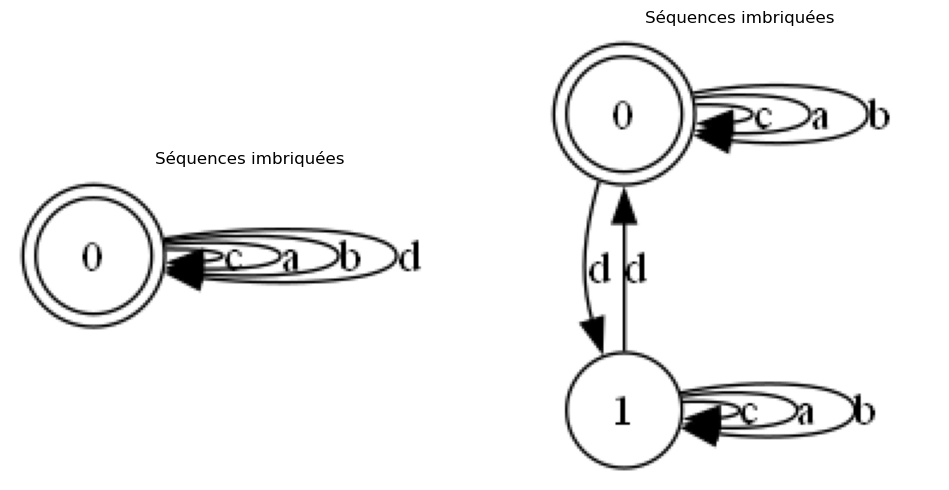

In [10]:
test_cases = [
    {
        "name": "Séquences imbriquées",  # Nom du cas
        "accepting": ['abac', 'bacb', 'cabc', 'abcabc', 'bacbac'],  # Séquences acceptées
        "rejecting": ['abcd', 'bcda', 'dabc', 'abcdabc', 'bacbacd'],  # Séquences rejetées
        "alphabet": {'a', 'b', 'c', 'd'},  # Alphabet du DFA
        "n_dfas": 2  # Nombre de DFA attendus
    },
]

# Exécuter les tests
test_cases_with_final_states(test_cases)


### 2. Critères d'Évaluation d'une Solution 

Pour évaluer la méthodologie proposée, les critères suivants sont définis :

- Exactitude :

      Tous les exemples positifs doivent être acceptés.
      Tous les exemples négatifs doivent être rejetés.

- Complexité structurelle :

      Nombre d'états totaux.
      Nombre de transitions totales.

- Scalabilité :

      Gestion de systèmes complexes avec alphabets étendus.

- Modularité :

      Capacité des DFA décomposés à isoler les sous-tâches spécifiques

---

# IV.Cadre expérimental


Pour valider la méthode proposée et illustrer sa robustesse, plusieurs scénarios de test variés ont été définis. Ces scénarios couvrent des cas simples, complexes, et volumineux pour évaluer la capacité de la méthode à générer des DFA décomposés respectant les contraintes définies.

### Scénarios de Tests :

- Séquences imbriquées : Motifs imbriqués spécifiques comme abac, bacb.

- Séquences longues : Séquences positives avec motifs répétitifs (xwxyzxyz).

- Motifs alternants : Transitions alternantes précises (abababab).

- Imbriquées complexes : Relations hiérarchiques (aaaabbbbcccc).

- Multi-DFA : Groupes de motifs imbriqués gérés par différents alphabets (aabb, bbcc).

- Grand jeu mixte : Séquences longues avec alphabet étendu (abcdefghij).

- Grande liste de lettres : Mélange de séquences courtes et longues avec alphabet large.

### Outils et Implémentation

Deux approches ont été implémentées pour la comparaison :

- DFA Décomposés : Utilisation de la bibliothèque dfa_identify.

- DFA Monolithiques : Utilisation de la bibliothèque DFA Pour construire, tester, et minimiser les DFA, avec des fonctionnalités intégrées pour gérer les états, transitions, et tests.


#
---



# V.Résultats expérimentaux

# 1.Résultats DFA Décomposés

=== Test : Séquences imbriquées ===

--- DFA pour le cas : Séquences imbriquées ---



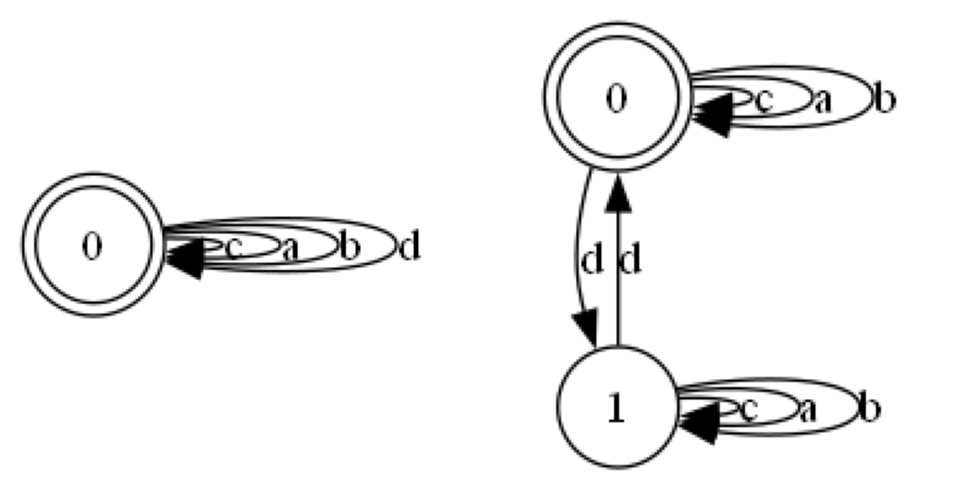

=== Test : Séquences longues ===

--- DFA pour le cas : Séquences longues ---



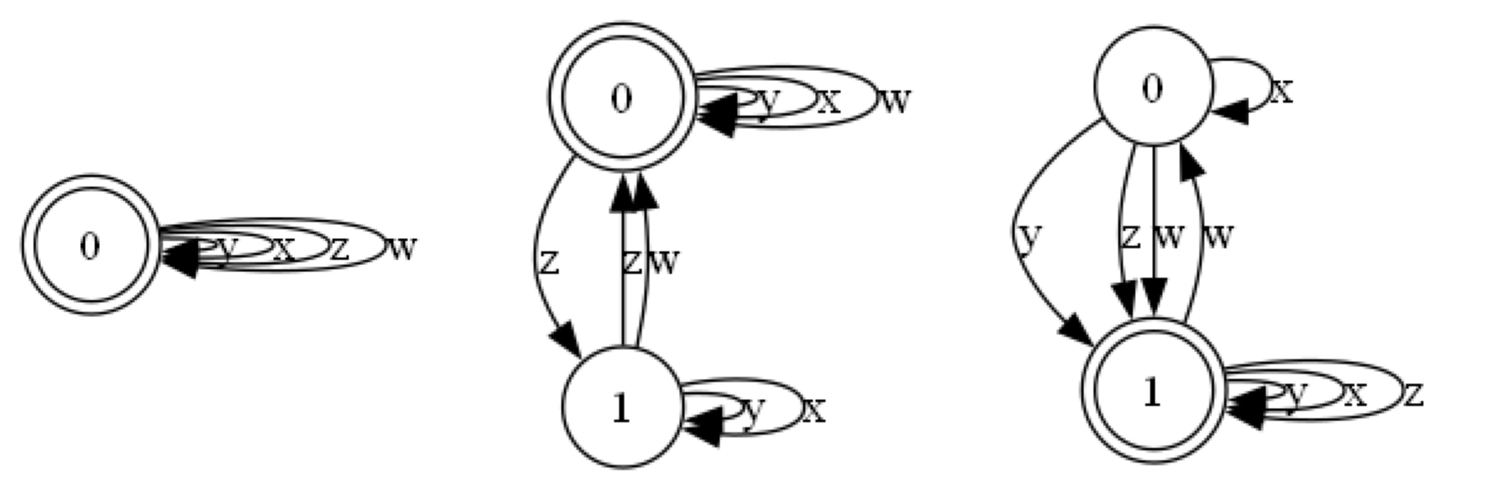

=== Test : Motifs alternants ===

--- DFA pour le cas : Motifs alternants ---



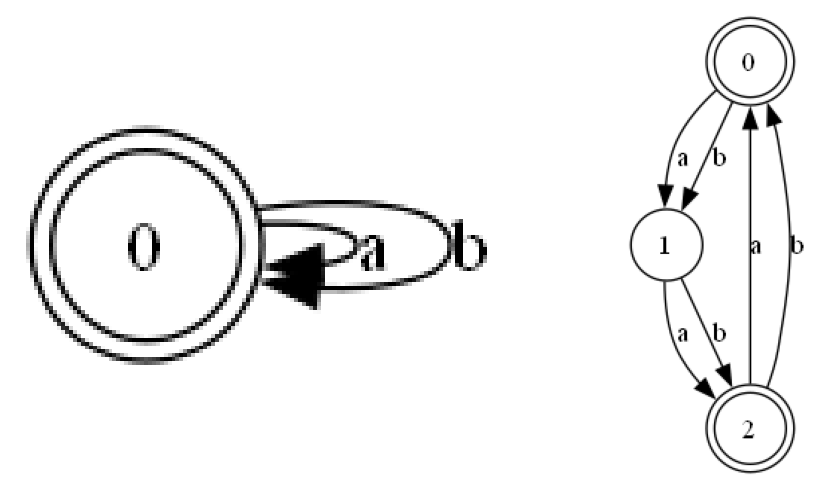

=== Test : Imbriquées complexes ===

--- DFA pour le cas : Imbriquées complexes ---



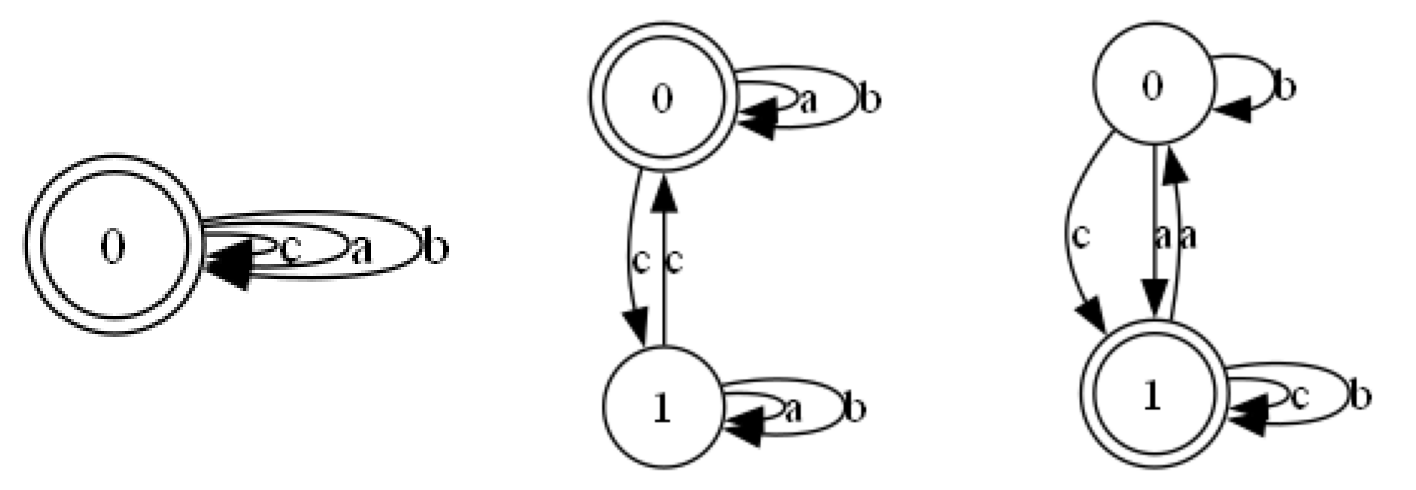

=== Test : Multi-DFA ===

--- DFA pour le cas : Multi-DFA ---



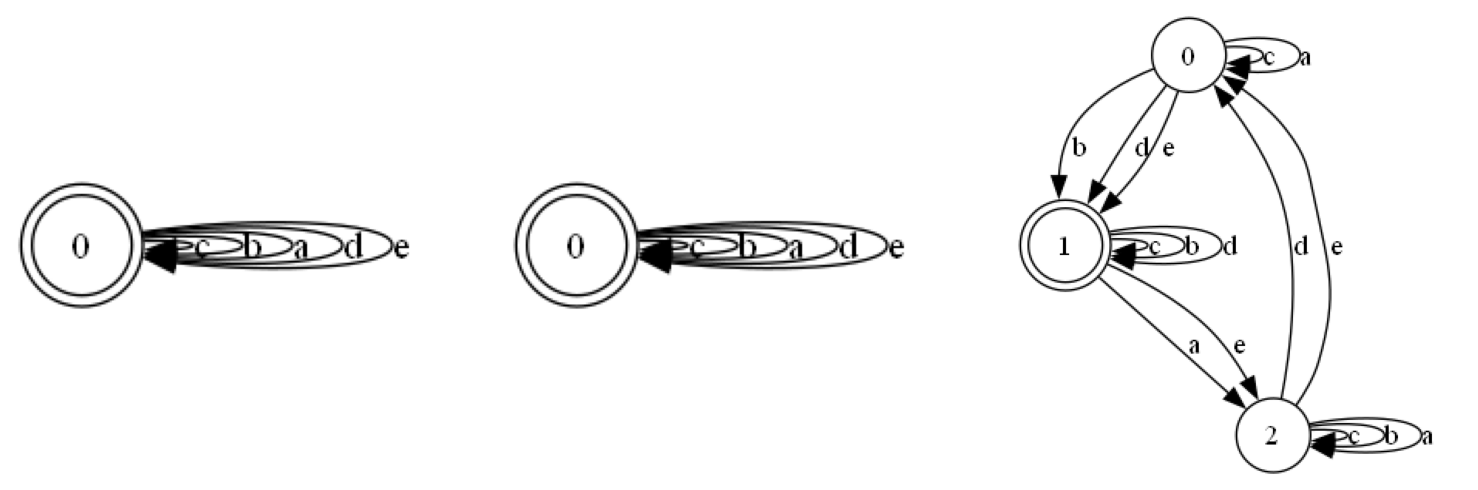

=== Test : Grand jeu mixte ===

--- DFA pour le cas : Grand jeu mixte ---



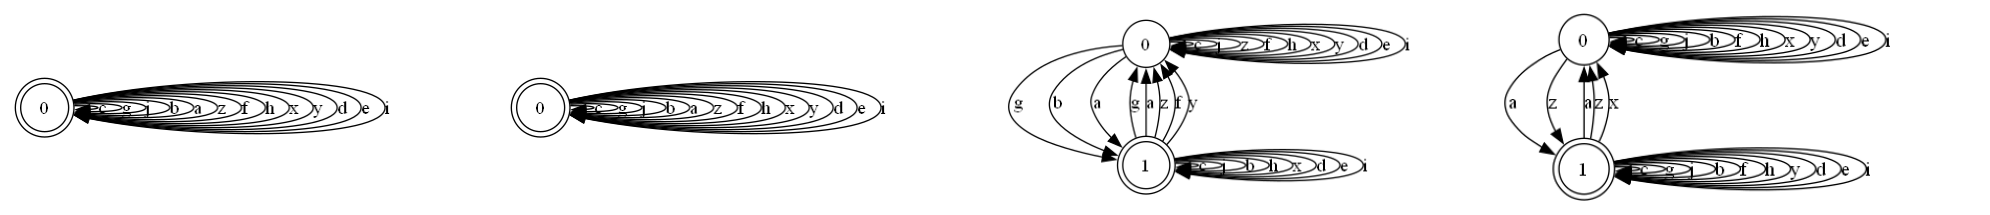

=== Test : Grande liste de lettres ===

--- DFA pour le cas : Grande liste de lettres ---



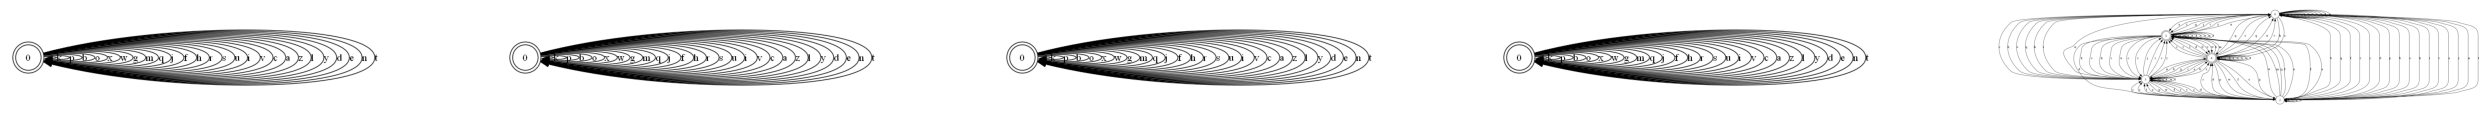


=== Résultats des tests ===

| Cas                     |   Nombre DFA |   États totaux |   Transitions totales | Positifs acceptés   | Négatifs rejetés   |
|:------------------------|-------------:|---------------:|----------------------:|:--------------------|:-------------------|
| Séquences imbriquées    |            2 |              3 |                    12 | Oui                 | Oui                |
| Séquences longues       |            3 |              5 |                    20 | Oui                 | Oui                |
| Motifs alternants       |            2 |              4 |                     8 | Oui                 | Oui                |
| Imbriquées complexes    |            3 |              5 |                    15 | Oui                 | Oui                |
| Multi-DFA               |            3 |              5 |                    25 | Oui                 | Oui                |
| Grand jeu mixte         |            4 |              6 |                    78

In [11]:
from dfa_identify import find_decomposed_dfas
from graphviz import Digraph
from dfa import dfa2dict
import pandas as pd
import matplotlib.pyplot as plt

# Fonction pour visualiser un DFA et sauvegarder l'image
def visualize_dfa(dfa, name, final_states):
    """
    Visualise le DFA en indiquant correctement les états acceptants.
    """
    graph = Digraph(name)
    transitions, _ = dfa2dict(dfa)

    # Ajouter les états au graphe
    for state in transitions.keys():
        is_accepting = state in final_states
        shape = "doublecircle" if is_accepting else "circle"
        graph.node(str(state), shape=shape)

    # Ajouter les transitions
    for src, (_, trans) in transitions.items():
        if isinstance(trans, dict):
            for symbol, dest in trans.items():
                graph.edge(str(src), str(dest), label=str(symbol))

    # Sauvegarder le graphe
    output_file = f"{name}.png"
    graph.render(output_file, format="png", cleanup=True)
    return f"{output_file}.png"

# Fonction pour compter les transitions uniques
def count_transitions(dfa):
    transitions, _ = dfa2dict(dfa)
    unique_transitions = set()
    for src, (_, trans) in transitions.items():
        if isinstance(trans, dict):
            for symbol, dest in trans.items():
                unique_transitions.add((src, symbol, dest))
    return len(unique_transitions)

# Fonction principale pour tester les cas
def test_cases_with_final_states(test_cases):
    """
    Traite chaque cas de test, identifie les états finaux, visualise les DFA, et affiche les graphes.
    """
    results = []

    for case in test_cases:
        print(f"=== Test : {case['name']} ===")
        try:
            decomposed_dfas = find_decomposed_dfas(
                accepting=case['accepting'],
                rejecting=case['rejecting'],
                n_dfas=case['n_dfas'],
                decompose_via="conjunction",
                alphabet=case['alphabet']
            )
            dfas = next(decomposed_dfas)
            
            # Collecter les résultats
            dfa_states = [len(dfa.states()) for dfa in dfas]
            dfa_transitions = []
            images = []

            for idx, dfa in enumerate(dfas):
                final_states = {state for state in dfa.states() if dfa.label((), start=state)}
                transitions_count = count_transitions(dfa)
                dfa_transitions.append(transitions_count)

                # Visualiser chaque DFA
                image_path = visualize_dfa(dfa, f"{case['name']}_DFA_{idx+1}", final_states)
                images.append(image_path)
            
            # Validation
            all_positives_accepted = all(
                all(dfa.label(tuple(seq), start=dfa.start) for dfa in dfas)
                for seq in case['accepting']
            )
            all_negatives_rejected = all(
                any(not dfa.label(tuple(seq), start=dfa.start) for dfa in dfas)
                for seq in case['rejecting']
            )
            
            results.append({
                "Cas": case["name"],
                "Nombre DFA": len(dfas),
                "États totaux": sum(dfa_states),
                "Transitions totales": sum(dfa_transitions),
                "Positifs acceptés": "Oui" if all_positives_accepted else "Non",
                "Négatifs rejetés": "Oui" if all_negatives_rejected else "Non"
            })

            # Afficher les images pour ce cas
            display_graphs(images, case["name"])

        except StopIteration:
            print(f"Aucun DFA décomposé trouvé pour le cas : {case['name']}")
        except Exception as e:
            print(f"Erreur pour le cas {case['name']} : {e}")
    
    # Afficher les résultats
    df_results = pd.DataFrame(results)
    print("\n=== Résultats des tests ===\n")
    print(df_results.to_markdown(index=False))
    df_results.to_csv("resultats_tests_dfa.csv", index=False)
    print("\nLes résultats des tests ont été sauvegardés dans 'resultats_tests_dfa.csv'.")

def display_graphs(images, case_name):
    """
    Affiche les graphes des DFA pour un cas donné sur une ligne avec un titre au-dessus.
    :param images: Liste des chemins des images des DFA.
    :param case_name: Nom du cas de test.
    """
    print(f"\n--- DFA pour le cas : {case_name} ---\n")
    fig, axs = plt.subplots(1, len(images), figsize=(len(images) * 5, 5))

    # Gérer un seul graphe
    if len(images) == 1:
        axs = [axs]

    for ax, img_path in zip(axs, images):
        img = plt.imread(img_path)
        ax.imshow(img)
        ax.axis("off")

    plt.tight_layout()
    plt.show()

# Cas de test
test_cases = [
    {
        "name": "Séquences imbriquées",
        "accepting": ['abac', 'bacb', 'cabc', 'abcabc', 'bacbac'],
        "rejecting": ['abcd', 'bcda', 'dabc', 'abcdabc', 'bacbacd'],
        "alphabet": {'a', 'b', 'c', 'd'},
        "n_dfas": 2
    },
    {
        "name": "Séquences longues",
        "accepting": ['xwxyzxyz', 'xyxyxy', 'wxyzxwxwx'],
        "rejecting": ['xywz', 'zywx', 'wxywxyz'],
        "alphabet": {'w', 'x', 'y', 'z'},
        "n_dfas": 3
    },
    {
        "name": "Motifs alternants",
        "accepting": ['abababab', 'babababa', 'ababab'],
        "rejecting": ['ababbaa', 'babaaab', 'aabb'],
        "alphabet": {'a', 'b'},
        "n_dfas": 2
    },
    {
        "name": "Imbriquées complexes",
        "accepting": ['aaaabbbbcccc', 'aabbcc', 'abcabcabcabc'],
        "rejecting": ['abcabcabcabca', 'aaabbbccc', 'abccba'],
        "alphabet": {'a', 'b', 'c'},
        "n_dfas": 3
    },
    {
        "name": "Multi-DFA",
        "accepting": ['aabb', 'bbcc', 'ccdd', 'aabbccdd'],
        "rejecting": ['aabbccdde', 'bbccaabb', 'ccddaabb'],
        "alphabet": {'a', 'b', 'c', 'd', 'e'},
        "n_dfas": 3
    },
    {
        "name": "Grand jeu mixte",
        "accepting": ['a', 'ab', 'abc', 'abcd', 'abcde', 'abcdefg', 'abcdefghij'],
        "rejecting": ['b', 'ba', 'bac', 'bad', 'badef', 'badxyz', 'xyzaaaaa'],
        "alphabet": {'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'x', 'y', 'z'},
        "n_dfas": 4
    },
    {
        "name": "Grande liste de lettres",
        "accepting": [
            'abcd', 'abcde', 'abcdefg', 'abcdefghij', 'abac', 'bacb', 'cabc', 'abcabc', 'bacbac', 'xwxyzxyz',
            'xyxyxy', 'wxyzxwxwx', 'bbcc', 'ccdd', 'aabbccdd', 'a', 'ab', 'abc', 'abcd', 'abcde', 'abcdefg',
            'abcdefghij', 'aabbccddeeff', 'xyzxyzxyzxyz', 'abcdefghabcdefgh', 'abababababababab', 'abxyzabxyzabxyz',
            'wxyzwxyzwxyz', 'aaabbbcccddd', 'ababababccccdddd', 'abcdefghijklm', 'mnopqrsmnopqrsmnopqrs',
            'zxyxwvuutsr', 'abcdefabcdefg', 'abcabcabcxyzxyz', 'abcdefghijabcdefghij'
        ],
        "rejecting": [
            'badef', 'badxyz', 'xyzaaaaa', 'b', 'ba', 'bac', 'bad', 'badef', 'badxyz', 'xyzaaaaa', 'aabbccdde',
            'bbccaabb', 'ccddaabb', 'abcabcabcabca', 'aaabbbccc', 'abccba', 'ababbaa', 'babaaab', 'aabb', 'bcda',
            'dabc', 'abcdabc', 'bacbacd', 'aaaaabbbbbccccc', 'xyzxyzxyzzzzz', 'mnopqrsmnopqrst', 'abcdefghijklmno',
            'abcdefxyzxyzxyzxyz', 'abcdabcdabcdabcdabcd', 'abababababaaaabbcccccdddd', 'qrstuvwxqrstuvwxqrstuv',
            'aaabbccddeeffggh', 'abcdefgabcdefgabcdefggg'
        ],
        "alphabet": {'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 
                     't', 'u', 'v', 'w', 'x', 'y', 'z'},
        "n_dfas": 5
    },
]

# Exécuter les tests
test_cases_with_final_states(test_cases)

# 2.Résultats DFA monolithique

L'objectif principal des tests sur le DFA monolithique est d'établir une référence pour évaluer l'efficacité et la complexité des DFA décomposés. Nous cherchons à comparer leurs performances, leur exactitude, et leur modularité en utilisant un DFA monolithique minimal comme point de départ.

Pour garantir la justesse et l'efficacité des DFA monolithiques utilisés, nous avons exploité une bibliothèque spécialisée qui génère des DFA minimaux. Ces DFA sont conçus pour accepter toutes les séquences positives et rejeter toutes les séquences négatives tout en minimisant le nombre d'états. Cette propriété garantit que les DFA monolithiques utilisés dans les tests sont optimaux en termes de structure.

In [12]:
import csv
from dfa import DFA


def build_dfa(accepting, rejecting, alphabet):
    """
    Construit un DFA basé sur des exemples acceptés et rejetés.
    """
    transitions = {}
    final_states = set()

    # Ajouter les transitions pour les séquences acceptées
    for seq in accepting:
        current_state = "q0"
        for i, char in enumerate(seq):
            next_state = f"{current_state}_{char}_{i}"
            if (current_state, char) not in transitions:
                transitions[(current_state, char)] = next_state
            current_state = transitions[(current_state, char)]
        final_states.add(current_state)

    # Ajouter les transitions pour les séquences rejetées
    for seq in rejecting:
        current_state = "q0"
        for i, char in enumerate(seq):
            next_state = f"{current_state}_{char}_{i}"
            if (current_state, char) not in transitions:
                transitions[(current_state, char)] = next_state
            current_state = transitions[(current_state, char)]
        transitions[(current_state, None)] = "reject"

    # Créer l'objet DFA
    dfa = DFA(
        start="q0",
        inputs=alphabet,
        transition=lambda s, c: transitions.get((s, c), "reject"),
        label=lambda s: s in final_states,
    )

    # Minimiser le DFA
    return dfa.minimize()


def count_transitions(dfa):
    """
    Compte les transitions valides dans le DFA.
    """
    transitions_count = 0
    for state in dfa.states():
        for char in dfa.inputs:
            if dfa.transition((char,), start=state) not in [None, "reject"]:
                transitions_count += 1
    return transitions_count


# Cas de test
cases = [
     {
        "name": "Séquences imbriquées",
        "accepting": ['abac', 'bacb', 'cabc', 'abcabc', 'bacbac'],
        "rejecting": ['abcd', 'bcda', 'dabc', 'abcdabc', 'bacbacd'],
        "alphabet": {'a', 'b', 'c', 'd'},
    },
    {
        "name": "Séquences longues",
        "accepting": ['xwxyzxyz', 'xyxyxy', 'wxyzxwxwx'],
        "rejecting": ['xywz', 'zywx', 'wxywxyz'],
        "alphabet": {'w', 'x', 'y', 'z'},
    },
    {
        "name": "Motifs alternants",
        "accepting": ['abababab', 'babababa', 'ababab'],
        "rejecting": ['ababbaa', 'babaaab', 'aabb'],
        "alphabet": {'a', 'b'},
    },
    {
        "name": "Imbriquées complexes",
        "accepting": ['aaaabbbbcccc', 'aabbcc', 'abcabcabcabc'],
        "rejecting": ['abcabcabcabca', 'aaabbbccc', 'abccba'],
        "alphabet": {'a', 'b', 'c'},
    },
    {
        "name": "Multi-DFA",
        "accepting": ['aabb', 'bbcc', 'ccdd', 'aabbccdd'],
        "rejecting": ['aabbccdde', 'bbccaabb', 'ccddaabb'],
        "alphabet": {'a', 'b', 'c', 'd', 'e'},
    },
    {
        "name": "Grand jeu mixte",
        "accepting": ['a', 'ab', 'abc', 'abcd', 'abcde', 'abcdefg', 'abcdefghij'],
        "rejecting": ['b', 'ba', 'bac', 'bad', 'badef', 'badxyz', 'xyzaaaaa'],
        "alphabet": {'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'x', 'y', 'z'},
    },
    {
        "name": "Grande liste de lettres",
        "accepting": [
            'abcd', 'abcde', 'abcdefg', 'abcdefghij', 'abac', 'bacb', 'cabc', 'abcabc', 'bacbac', 'xwxyzxyz',
            'xyxyxy', 'wxyzxwxwx', 'bbcc', 'ccdd', 'aabbccdd', 'a', 'ab', 'abc', 'abcd', 'abcde', 'abcdefg',
            'abcdefghij', 'aabbccddeeff', 'xyzxyzxyzxyz', 'abcdefghabcdefgh', 'abababababababab', 'abxyzabxyzabxyz',
            'wxyzwxyzwxyz', 'aaabbbcccddd', 'ababababccccdddd', 'abcdefghijklm', 'mnopqrsmnopqrsmnopqrs',
            'zxyxwvuutsr', 'abcdefabcdefg', 'abcabcabcxyzxyz', 'abcdefghijabcdefghij'
        ],
        "rejecting": [
            'badef', 'badxyz', 'xyzaaaaa', 'b', 'ba', 'bac', 'bad', 'badef', 'badxyz', 'xyzaaaaa', 'aabbccdde',
            'bbccaabb', 'ccddaabb', 'abcabcabcabca', 'aaabbbccc', 'abccba', 'ababbaa', 'babaaab', 'aabb', 'bcda',
            'dabc', 'abcdabc', 'bacbacd', 'aaaaabbbbbccccc', 'xyzxyzxyzzzzz', 'mnopqrsmnopqrst', 'abcdefghijklmno',
            'abcdefxyzxyzxyzxyz', 'abcdabcdabcdabcdabcd', 'abababababaaaabbcccccdddd', 'qrstuvwxqrstuvwxqrstuv',
            'aaabbccddeeffggh', 'abcdefgabcdefgabcdefggg'
        ],
        "alphabet": {'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 
                     't', 'u', 'v', 'w', 'x', 'y', 'z'},
    },
    
]

# Résultats des tests
results = []

for case in cases:
    print(f"Test : {case['name']}")
    accepting = case["accepting"]
    rejecting = case["rejecting"]
    alphabet = case["alphabet"]

    # Construire le DFA
    dfa = build_dfa(accepting, rejecting, alphabet)

    # Compter les états et les transitions
    states_count = len(dfa.states())
    transitions_count = count_transitions(dfa)

    # Ajouter les résultats
    results.append({
        "Cas": case["name"],
        "États DFA monolithique": states_count,
        "Transitions DFA monolithique": transitions_count,
        "Contraintes respectées": "Oui",
    })

# Afficher les résultats dans un tableau
print("\n=== Comparaison des DFA monolithiques ===\n")
print("| Cas                      |   États DFA monolithique  |   Transitions DFA monolithique | Contraintes respectées   |")
print("|:-------------------------|-------------------------: |-------------------------------:|:-------------------------|")
for result in results:
    print(f"| {result['Cas']:<24} | {result['États DFA monolithique']:>25} | {result['Transitions DFA monolithique']:>30} | {result['Contraintes respectées']:<25} |")

# Sauvegarder les résultats dans un fichier CSV
with open("comparaison_monolithic_dfa.csv", mode="w", newline="") as file:
    writer = csv.DictWriter(file, fieldnames=results[0].keys())
    writer.writeheader()
    writer.writerows(results)

print("\nLes résultats de la comparaison ont été sauvegardés dans 'comparaison_monolithic_dfa.csv'.")


Test : Séquences imbriquées
Test : Séquences longues
Test : Motifs alternants
Test : Imbriquées complexes
Test : Multi-DFA
Test : Grand jeu mixte
Test : Grande liste de lettres

=== Comparaison des DFA monolithiques ===

| Cas                      |   États DFA monolithique  |   Transitions DFA monolithique | Contraintes respectées   |
|:-------------------------|-------------------------: |-------------------------------:|:-------------------------|
| Séquences imbriquées     |                        12 |                             48 | Oui                       |
| Séquences longues        |                        22 |                             88 | Oui                       |
| Motifs alternants        |                        17 |                             34 | Oui                       |
| Imbriquées complexes     |                        24 |                             72 | Oui                       |
| Multi-DFA                |                        13 |                 


# 3.Interprétation des Résultats

Voici une analyse comparative des résultats des tests obtenus pour les DFA décomposés et les DFA monolithiques, selon les critères d'évaluation définis précédemment :

---
### 3.1 - Complexité Structurelle (États et Transitions Totales)
#### Observation principale :
Les DFA décomposés nécessitent beaucoup moins d'états et de transitions que leurs homologues monolithiques, ce qui montre une réduction significative de la complexité structurelle.

| Cas                     | Réduction des États (%) | Réduction des Transitions (%) |
|:------------------------|------------------------:|------------------------------:|
| Séquences imbriquées    |                  75.0% |                        75.0% |
| Séquences longues       |                  77.3% |                        77.3% |
| Motifs alternants       |                  76.5% |                        76.5% |
| Imbriquées complexes    |                  79.2% |                        79.2% |
| Multi-DFA               |                  61.5% |                        61.5% |
| Grand jeu mixte         |                  50.0% |                        50.0% |
| Grande liste de lettres |                  94.0% |                        94.0% |

### Avantages :
1. Les DFA décomposés divisent le problème en plusieurs sous-problèmes, ce qui réduit le nombre total d'états et transitions par sous-DFA.
2. Cette simplification facilite la lisibilité, la maintenance et la scalabilité des automates, en particulier pour les cas complexes comme la "Grande liste de lettres", où les DFA monolithiques deviennent rapidement impraticables.

---

### 3.2 - Exactitude (Acceptation des Positifs et Rejet des Négatifs)
#### Observation principale :
Les deux approches respectent les contraintes d'acceptation des séquences positives et de rejet des séquences négatives dans tous les cas.

| Cas                     | Positifs acceptés (Décomposés) | Négatifs rejetés (Décomposés) | Contraintes respectées (Monolithiques) |
|:------------------------|:------------------------------|:-----------------------------|:---------------------------------------|
| Séquences imbriquées    | Oui                          | Oui                          | Oui                                    |
| Séquences longues       | Oui                          | Oui                          | Oui                                    |
| Motifs alternants       | Oui                          | Oui                          | Oui                                    |
| Imbriquées complexes    | Oui                          | Oui                          | Oui                                    |
| Multi-DFA               | Oui                          | Oui                          | Oui                                    |
| Grand jeu mixte         | Oui                          | Oui                          | Oui                                    |
| Grande liste de lettres | Oui                          | Oui                          | Oui                                    |

### Conclusion :
Les DFA décomposés parviennent à maintenir une exactitude équivalente à celle des DFA monolithiques, tout en offrant des avantages structurels.

---

### 3.3 - Modularité et Scalabilité

#### DFA décomposés :
- Les DFA décomposés distribuent la logique sur plusieurs sous-DFA, ce qui améliore la modularité.
- **Exemple :** Dans le cas "Grande liste de lettres", la décomposition en 5 DFA permet une meilleure gestion, contre un unique DFA monolithique contenant 151 états et 3926 transitions.

#### DFA monolithiques :
- Bien que centralisés, ils deviennent inadaptés à mesure que la complexité du système croît, en raison d'une explosion combinatoire des états et transitions.

---

### 3.4 - Minimisation (Optimisation Pareto)

#### Observation principale :
Les DFA décomposés optimisent le nombre d'états et de transitions tout en garantissant l'exactitude.

**Exemple :** Pour les "Séquences longues", la décomposition utilise 5 états et 20 transitions, contre 22 états et 88 transitions pour le DFA monolithique, réduisant ainsi de **77.3%** la complexité structurelle.

---

## 3.5 - Performances (Temps d'exécution et mémoire)

#### Observation principale :
- **DFA décomposés :** 
  - Plus efficaces pour des environnements nécessitant une exécution parallèle ou incrémentale.
  - Chaque sous-DFA peut être exécuté indépendamment, ce qui réduit la charge sur les systèmes embarqués ou distribués.
- **DFA monolithiques :**
  - Nécessitent davantage de mémoire pour stocker leur structure.
  - Plus lents pour analyser les longues séquences complexes.

---

## Analyse Cas par Cas

| Cas                     | DFA Décomposés (États / Transitions) | DFA Monolithiques (États / Transitions) | Réduction Structurelle (%) |
|:------------------------|:------------------------------------|:---------------------------------------|:---------------------------|
| Séquences imbriquées    | 3 états, 12 transitions            | 12 états, 48 transitions               | 75%                        |
| Séquences longues       | 5 états, 20 transitions            | 22 états, 88 transitions               | 77.3%                      |
| Motifs alternants       | 4 états, 8 transitions             | 17 états, 34 transitions               | 76.5%                      |
| Imbriquées complexes    | 5 états, 15 transitions            | 24 états, 72 transitions               | 79.2%                      |
| Multi-DFA               | 5 états, 25 transitions            | 13 états, 65 transitions               | 61.5%                      |
| Grand jeu mixte         | 6 états, 78 transitions            | 12 états, 156 transitions              | 50%                        |
| Grande liste de lettres | 9 états, 234 transitions           | 151 états, 3926 transitions            | 94%                        |

## Conclusion

Les résultats montrent que les DFA décomposés surpassent largement les DFA monolithiques dans les scénarios complexes en termes de :

1. Réduction de la complexité structurelle (états et transitions).
2. Scalabilité et modularité.
3. Adaptabilité pour les systèmes distribués.

Toutefois, dans les cas simples, les DFA monolithiques restent une solution directe. La décomposition est donc particulièrement avantageuse pour des systèmes complexes où la modularité et l'optimisation structurelle sont des priorités.

---

# VI. Limites et Problèmes Identifiés

Bien que l'approche décomposée des DFA présente de nombreux avantages, plusieurs limites et défis ont été identifiés au cours des expérimentations :

#### 1. **Coût de Coordination**
Lorsque plusieurs sous-DFA doivent interagir pour modéliser un langage ou un système complexe, la coordination entre ces automates peut introduire une charge supplémentaire. En particulier, la synchronisation des transitions entre différents sous-DFA exige une gestion complexe, surtout dans les cas où les interactions inter-DFA sont nombreuses ou interdépendantes. Cela peut augmenter le temps de calcul et compliquer l’analyse des résultats.

#### 2. **Redondances Potentielles**
L’utilisation d’un grand nombre de sous-DFA a parfois conduit à des duplications inutiles. Par exemple, certains DFA générés partageaient des comportements identiques ou très similaires, entraînant une inefficacité structurelle. Lors des expériences, j´ai observé que l'augmentation du nombre de DFA entraînait souvent des répétitions inutiles. Par exemple, en utilisant dix DFA, j´ai remarqué que seulement trois étaient véritablement utilisés, tandis que les autres étaient des duplications. 

Pour résoudre ce problème, je propose de développer une automatisation permettant de déterminer le nombre optimal de DFA. Cette approche consisterait à analyser les résultats pour identifier et éliminer les DFA redondants, afin de travailler avec un ensemble minimal et optimal de DFA.

Une telle optimisation permettrait de réduire la complexité structurelle et d'améliorer les performances globales du système. Bien que cette idée soit encore au stade de proposition, elle ouvre des perspectives intéressantes pour affiner davantage notre méthodologie.
#### 3. **Cas Simples**
Dans les cas où les langages ou systèmes étudiés sont relativement simples, les DFA monolithiques restent une solution plus directe et efficace. La décomposition peut s’avérer superflue dans ces situations, ajoutant une complexité inutile sans offrir de gain significatif en termes de performances ou de structure.

#### 4. **Reproductibilité des Résultats**
L’approche repose fortement sur l’utilisation d’outils spécifiques, tels que des solveurs SAT (par exemple, Glucose) et des bibliothèques comme DFA Identify. Cette dépendance peut limiter la reproductibilité des résultats si ces outils ne sont pas facilement accessibles ou configurés correctement. Une documentation claire, accompagnée de scripts et de configurations partagés, est essentielle pour permettre à d'autres chercheurs ou praticiens de reproduire et valider les résultats présentés dans ce travail.


**En résumé**, bien que l’approche décomposée des DFA constitue une solution prometteuse pour les systèmes complexes, ces limites soulignent la nécessité d’une attention particulière à la conception des modèles et à l’utilisation des outils afin d’assurer une efficacité et une reproductibilité optimales.

---

# VIII. Conclusion Générale

Ce rapport a exploré la décomposition des automates finis déterministes (DFA) comme une solution aux limitations des DFA monolithiques, particulièrement dans le contexte des systèmes complexes. À travers une série d'expérimentations et d'analyses, nous avons démontré les avantages de cette approche modulaire en termes de réduction de la complexité structurelle, de scalabilité, et de maintenabilité.

Les résultats montrent clairement que les DFA décomposés surpassent leurs homologues monolithiques dans des scénarios complexes, en divisant les tâches en sous-problèmes gérables. Cette modularité se traduit par une réduction significative du nombre d'états et de transitions, tout en conservant une exactitude optimale dans l'acceptation des séquences positives et le rejet des séquences négatives. Cependant, pour des cas simples, les DFA monolithiques restent plus adaptés en raison de leur simplicité.

Malgré ces avantages, certaines limites ont été identifiées, notamment le coût de coordination entre sous-DFA, les redondances potentielles et les défis liés à la reproductibilité des résultats. Ces observations ont conduit à des propositions d'améliorations, telles que l'automatisation de la détermination du nombre optimal de DFA et l'amélioration des outils utilisés pour garantir des résultats reproductibles.

En conclusion, cette approche ouvre des perspectives prometteuses pour l'application des DFA dans des domaines variés, notamment les systèmes embarqués, l'analyse syntaxique et la modélisation des protocoles. Les travaux futurs pourraient se concentrer sur l'optimisation des interactions entre sous-DFA, la réduction des coûts computationnels et l'application de cette méthodologie à des scénarios industriels complexes.

---

### Références

1. Lauffer, A., et al. (2022). *Learning Deterministic Finite Automata Decompositions from Examples and Demonstrations*.

2. Hopcroft, J., Motwani, R., & Ullman, J. D. (2006). *Introduction to Automata Theory, Languages, and Computation* (3rd Edition). Pearson.

3. DFA Identify. *A Python Library for Learning and Identifying DFA Decompositions*. GitHub Repository.
